In [60]:
import pandas as pd

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_right_data.xlsx")
right=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/right_data.xlsx")
left_drop20=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_data_drop.xlsx")
left=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_data.xlsx")


In [61]:
data.isnull().sum()

FORCE_L           0
X_COR_L         388
Y_COR_L         629
COPX              0
COPY              0
FSR_L             0
FSRNONOISE_L      0
FSR_mass_L        1
FORCE_R           0
X_COR_R         358
Y_COR_R         358
COPX.1            0
COPY.1            0
FSR_R             0
FSRNONOISE_R      0
FSR_mass_R        0
dtype: int64

In [62]:
right.isnull().sum()

FORCE           0
X_COR         358
Y_COR         358
COPX            0
COPY            0
FSR             0
FSRNONOISE      0
FSR_mass        0
dtype: int64

In [63]:
right_columns=right.columns
leftdrop_columns=left_drop20.columns

In [64]:
leftdrop_columns

Index(['FORCE', 'X_COR', 'Y_COR', 'COPX', 'COPY', 'FSR', 'FSRNONOISE',
       'FSR_mass'],
      dtype='object')

In [65]:
for i in right_columns:
    right[i].fillna(right[i].mean(),inplace=True)
    left[i].fillna(left[i].mean(),inplace=True)

In [67]:
right.isnull().sum()

FORCE         0
X_COR         0
Y_COR         0
COPX          0
COPY          0
FSR           0
FSRNONOISE    0
FSR_mass      0
dtype: int64

In [68]:
left.isnull().sum()

FORCE         0
X_COR         0
Y_COR         0
COPX          0
COPY          0
FSR           0
FSRNONOISE    0
FSR_mass      0
dtype: int64

<Axes: >

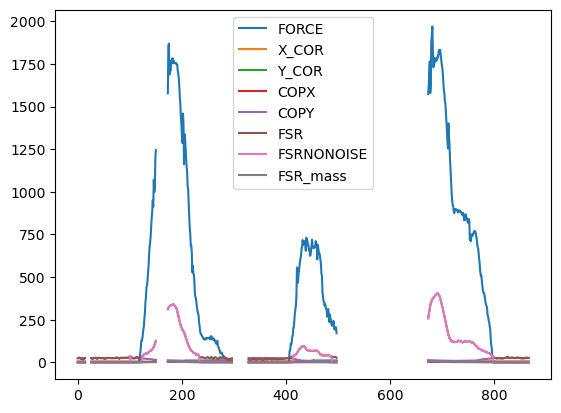

In [69]:
left_drop20.plot()

In [70]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [71]:
lsvr = LinearSVR(verbose=0, dual=True)
print(lsvr)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

LinearSVR(dual=True)


LinearSVR(dual=True)

In [72]:
x=right['FORCE']
y=left['FORCE']

In [34]:
X=pd.DataFrame(data=x)
Y=pd.DataFrame(data=y)

X

,FORCE
0,0
1,0
2,0
3,0
4,0
...,...
862,0
863,0
864,0
865,0


In [73]:
Y.isnull().sum()

FSR_mass    0
dtype: int64

In [74]:
lsvr.fit(X,Y)

/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(dual=True)

In [75]:
ypred=lsvr.predict(X)

In [76]:
left_drop20['FORCE']=ypred

In [77]:
left_drop20.isnull().sum()

FORCE           0
X_COR         495
Y_COR         725
COPX          239
COPY          239
FSR           239
FSRNONOISE    239
FSR_mass      240
dtype: int64

In [78]:
for i in right_columns:
    x=right[i]
    y=left[i]
    X=pd.DataFrame(data=x)
    Y=pd.DataFrame(data=y)
    lsvr.fit(X,Y)
    ypred=lsvr.predict(X)
    left_drop20[i]=ypred







/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/withmocha/anaconda3/envs/conda/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/withmocha/anaconda3/e

In [79]:
left_drop20.isnull().sum()

FORCE         0
X_COR         0
Y_COR         0
COPX          0
COPY          0
FSR           0
FSRNONOISE    0
FSR_mass      0
dtype: int64

<Axes: >

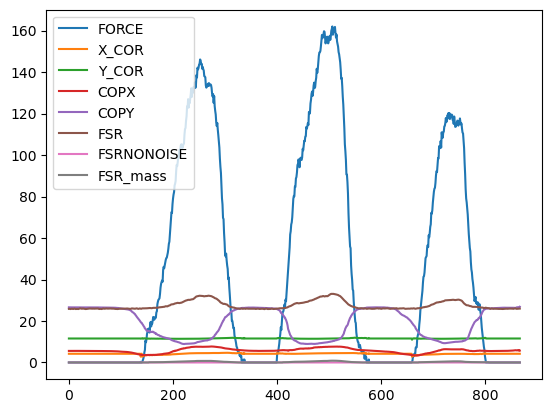

In [80]:
left_drop20.plot()